In [10]:
import matplotlib.pyplot as plt
import numpy as np
import skimage
import utils


In [11]:



def convolve_im_spatial(im: np.array,
                kernel: np.array,
                verbose=True):
    """ Convolves the image (im) with the spatial kernel (kernel),
        and returns the resulting image.

        "verbose" can be used for turning on/off visualization
        convolution
        
        Note: kernel can be of different shape than im.

    Args:
        im: np.array of shape [H, W]
        kernel: np.array of shape [K, K] 
        verbose: bool
    Returns:
        im: np.array of shape [H, W]
    """
    ### START YOUR CODE HERE ###

    # Get image and kernel shapes
    h, w = im.shape
    kh, kw = kernel.shape

    # Create padded kernel with zeros
    padded_kernel = np.zeros_like(im)

    # Compute the center position
    pad_h = (h - kh) // 2
    pad_w = (w - kw) // 2

    # Place the kernel at the center of the padded kernel
    padded_kernel[pad_h:pad_h+kh, pad_w:pad_w+kw] = kernel

    # Shift the kernel to align with the FFT
    padded_kernel_shifted = np.fft.ifftshift(padded_kernel)

    # Compute the FFT of the image and the kernel
    fft_im = np.fft.fft2(im)
    fft_kernel = np.fft.fft2(padded_kernel_shifted)

    # Multiply in the frequency domain (Convolution Theorem)
    fft_filtered = fft_im * fft_kernel

    # Compute the inverse FFT to get the filtered image in spatial domain
    conv_result = np.fft.ifft2(fft_filtered)

    # Take the real part (the imaginary part should be negligible)
    conv_result = np.real(conv_result)

    if verbose:
        # Use plt.subplot to place images side by side
        plt.figure(figsize=(20, 4))
        
        # Original Image
        plt.subplot(1, 5, 1)
        plt.imshow(im, cmap="gray")
        plt.title("Original Image")
        plt.axis('off')
        
        # Amplitude of the image in frequency domain
        plt.subplot(1, 5, 2) 
        fft_im_shifted = np.fft.fftshift(fft_im)
        amplitude_fft_im = np.abs(fft_im_shifted)
        amplitude_fft_im_log = np.log(1 + amplitude_fft_im)
        plt.imshow(amplitude_fft_im_log, cmap="gray")
        plt.title("FFT Image")
        plt.axis('off')
        
        # Amplitude of the kernel in frequency domain
        plt.subplot(1, 5, 3)
        fft_kernel_shifted = np.fft.fftshift(fft_kernel)
        amplitude_fft_kernel = np.abs(fft_kernel_shifted)
        amplitude_fft_kernel_log = np.log(1 + amplitude_fft_kernel)
        plt.imshow(amplitude_fft_kernel_log, cmap="gray")
        plt.title("FFT Kernel")
        plt.axis('off')
        
        # Amplitude of the filtered image in the frequency domain
        plt.subplot(1, 5, 4)
        fft_filtered_shifted = np.fft.fftshift(fft_filtered)
        amplitude_fft_filtered = np.abs(fft_filtered_shifted)
        amplitude_fft_filtered_log = np.log(1 + amplitude_fft_filtered)
        plt.imshow(amplitude_fft_filtered_log, cmap="gray")
        plt.title("Filtered FFT Image")
        plt.axis('off')
        
        # Filtered image in the spatial domain
        plt.subplot(1, 5, 5) 
        plt.imshow(conv_result, cmap="gray")
        plt.title("Filtered Spatial Image")
        plt.axis('off')
        
        plt.tight_layout()
    return conv_result

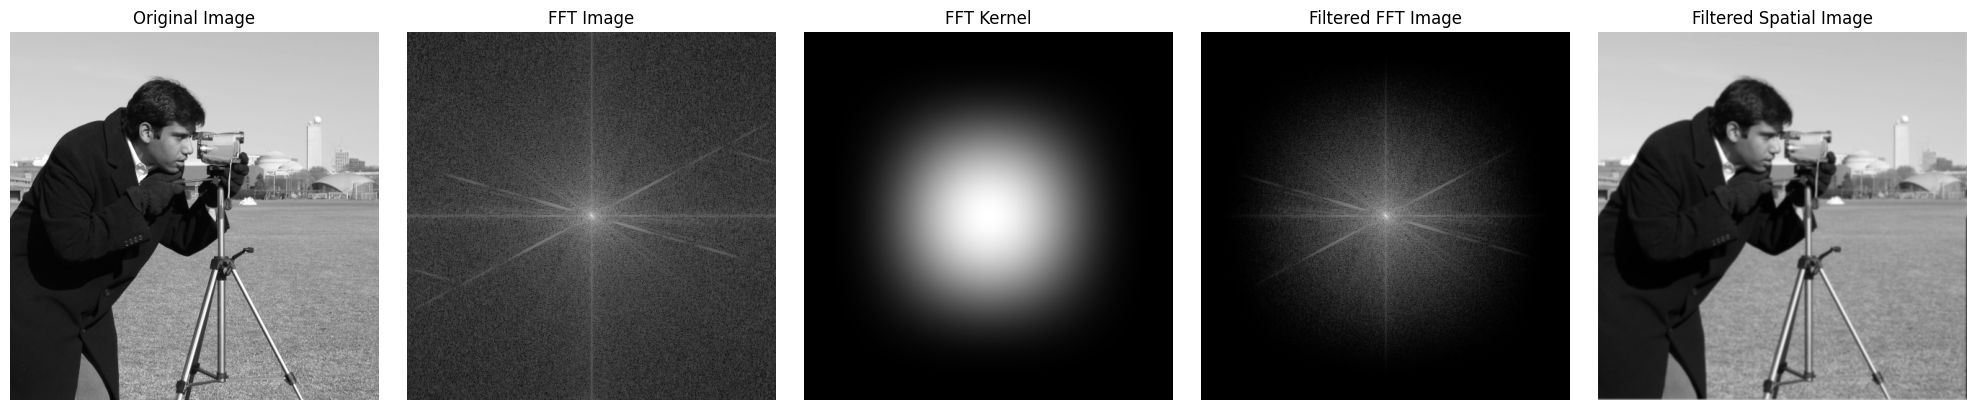

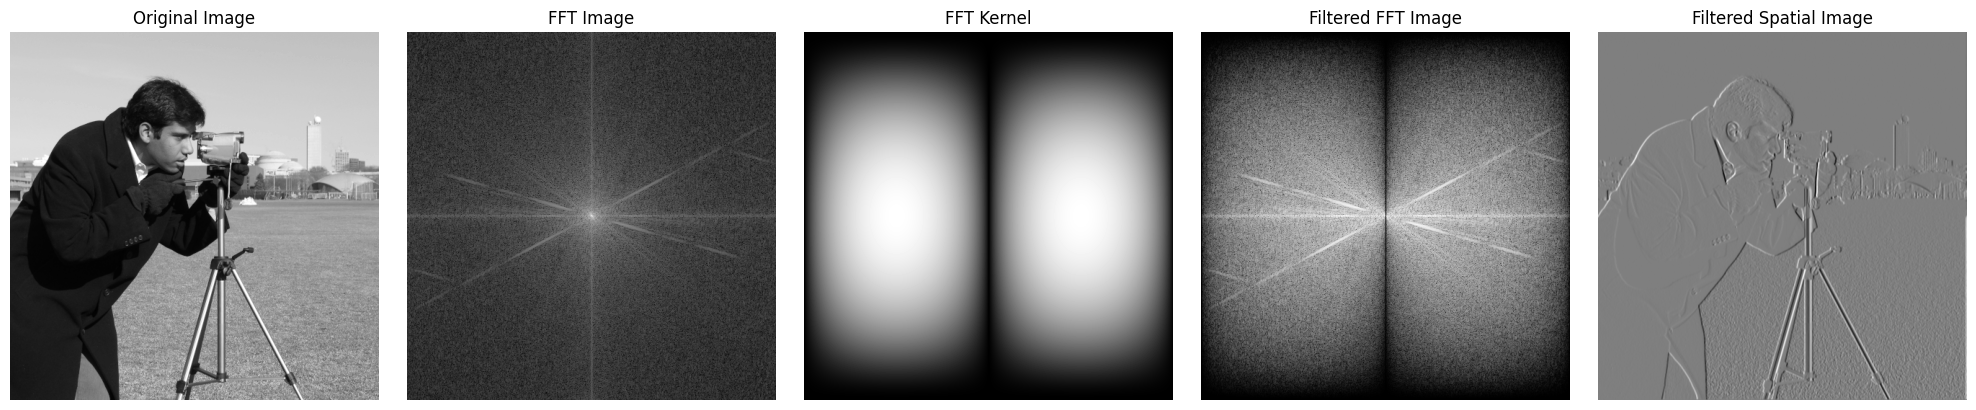

Saving image to: image_processed\camera_gaussian.png
Saving image to: image_processed\camera_sobelx.png


In [12]:
if __name__ == "__main__":
    verbose = True  # change if you want

    # Changing this code should not be needed
    im = skimage.data.camera()
    im = utils.uint8_to_float(im)

    # DO NOT CHANGE
    gaussian_kernel = np.array([
        [1, 4, 6, 4, 1],
        [4, 16, 24, 16, 4],
        [6, 24, 36, 24, 6],
        [4, 16, 24, 16, 4],
        [1, 4, 6, 4, 1],
    ]) / 256
    image_gaussian = convolve_im_spatial(im, gaussian_kernel, verbose)

    # DO NOT CHANGE
    sobel_horizontal = np.array([
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ])
    image_sobelx = convolve_im_spatial(im, sobel_horizontal, verbose)

    if verbose:
        plt.show()

    utils.save_im("camera_gaussian.png", image_gaussian)
    utils.save_im("camera_sobelx.png", image_sobelx)